In [1]:
import matplotlib.pyplot as plt
import re
import numpy as np

import seaborn as sns
sns.set_theme(font_scale=1.5);

In [2]:
!ls

build_table.ipynb		    G4data_sin45_mono.pkl
build_table_PAD.ipynb		    GEANT4-EPP-SIM-PAD.14486112.out
build_table_PAD_test2.ipynb	    output_parser.ipynb
edepProfiles.mat		    plot_spectra_iso.ipynb
electron_human_dose_conversion.csv  plot_spectra_iso_test.ipynb
EPMC_results.png		    sampling_checks.ipynb
fig2_results.mat		    test.ipynb
G4data_sin45_exp.pkl


In [2]:
killedParticleCounter = 0;
killedParticleEnergy  = 0;

altitude = [];
PA       = [];
gyro     = [];

with open("GEANT4-EPP-SIM-PAD.14486112.out", 'r') as f:

    #A = f.readlines()[1445:-1] # 2 thread
    A = f.readlines()[1482:-1] # 40 thread
        
    for line in A:
        if 'Track' in line and 'energy' in line:
            killedParticleCounter += 1
            killedParticleEnergy  += float(line[23:-1].split(' ')[0]);
            
        elif 'position' in line:
                    
            altitude.append(float(line[14:-1].split(' ')[0].split(')')[0].split(',')[2])/1e6+500)
            #pass
            
        elif 'momentum' in line:
            tmp = line[15:-1].split(',')
            px = float(tmp[0])
            py = float(tmp[1])
            pz = float(tmp[2].split(')')[0])
            
            PA.append(np.rad2deg(np.arctan(np.sqrt(px**2 + py**2)/pz)))
            gyro.append(np.rad2deg(np.arctan(py/px)));
                                                
print("Number of killed particles: %.0f\nKilled particle total energy: %.3f keV" % 
      (killedParticleCounter, 1e3*killedParticleEnergy))

Number of killed particles: 839
Killed particle total energy: 773012.538 keV


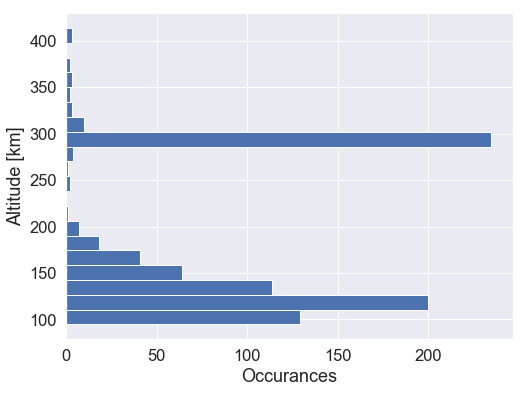

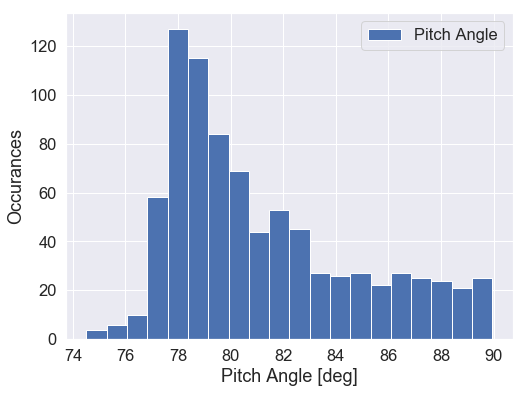

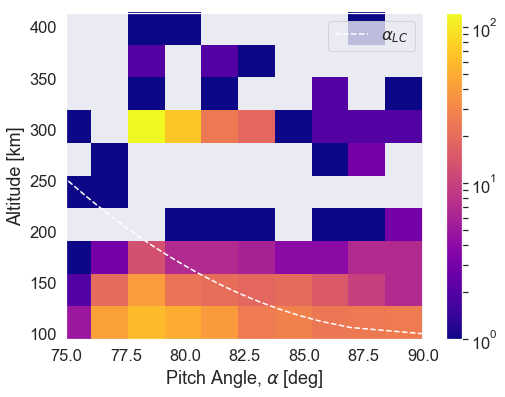

In [12]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(8,6));
plt.hist(altitude, bins=20, orientation='horizontal', density=False);
plt.ylabel('Altitude [km]');
plt.xlabel('Occurances');

plt.figure(figsize=(8,6));
#plt.hist(np.abs(gyro), bins=20, label='Gyrophase')
plt.hist(np.abs(PA), bins=20, density=False, label='Pitch Angle');
plt.ylabel('Occurances');
plt.xlabel('Pitch Angle [deg]');
plt.legend();


#np.array(altitude)[np.array(altitude) > 200] = 0

plt.figure(figsize=(8,6));  plt.grid(False)
plt.hist2d(np.abs(PA), altitude, cmap='plasma', norm=LogNorm());
plt.colorbar();
plt.xlabel(r'Pitch Angle, $\alpha$ [deg]');
plt.ylabel('Altitude [km]');

Rearth = 6378
alt = np.linspace(100, 400);
LCangle = np.rad2deg(np.arcsin(np.sqrt( ((Rearth + 100)/(Rearth + alt))**3 )))


#for ind, item in enumerate(alt):
#    print("%.0f, %.0f" % (item, LCangle[ind]))

plt.plot(LCangle, alt, 'w--', label=r'$\alpha_{LC}$')

plt.legend()

plt.xlim(75, 90);